In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../State_Data.csv")
df = df.drop(columns=["% Buddhist", "% Jewish", "% Hindu", "% Muslim"])
df.head()

,state,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
0,Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,30.5
1,Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,14.2
2,Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,5.5
3,Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,30.7
4,California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,-20.5


In [14]:
def get_bin(a: float):
    if a < 0:
        # Kamala won
        return 0
    else:
        # Trump won
        return 1
    
df["Election Result"] = df["Election Result"].apply(get_bin)
df.head()

,state,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
0,Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,1
1,Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,1
2,Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,1
3,Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,1
4,California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,0


In [15]:
df.set_index("state", inplace=True)

In [16]:
scaled_data = df.copy()
scaled_data = scaled_data.drop(columns=["Election Result"])
scaled_data.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age
state,,,,,,,,,,
Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5
Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1
Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2
Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7
California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2


In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns[:10])
scaled_data.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age
0,0.117881,0.627566,0.617284,0.017889,0.077419,0.238532,0.348228,1.00000,0.109992,0.576
1,0.003891,0.552786,0.061728,0.143113,0.116129,0.573394,0.459168,0.25000,0.167977,0.304
2,0.178402,0.533724,0.108642,0.075134,0.634409,0.087156,0.835131,0.34375,0.215692,0.552
3,0.064711,0.689150,0.345679,0.019678,0.150538,0.128440,0.314330,0.78125,0.048740,0.512
4,1.000000,0.243402,0.123457,0.309481,0.823656,0.600917,0.910632,0.21875,0.312145,0.472


In [18]:
scaled_data = scaled_data.round()

scaled_data.set_index(df.index, inplace=True)

scaled_data["Election Result"] = df["Election Result"]

scaled_data.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
state,,,,,,,,,,,
Alabama,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
Alaska,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
Arizona,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
Arkansas,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
California,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0


In [20]:
nb = BernoulliNB()

X = scaled_data.drop(columns=["Election Result"])
y = scaled_data["Election Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

nb.fit(X_train, y_train)

print(nb.score(X_test, y_test))

0.75


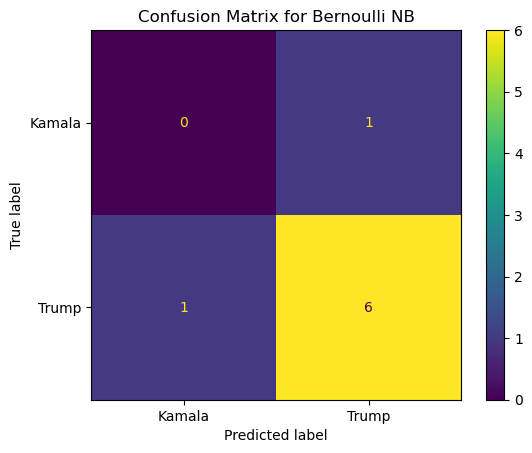

In [22]:
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Kamala", "Trump"])
disp.plot()

plt.title("Confusion Matrix for Bernoulli NB")
plt.show()